## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance 

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [236]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [237]:
from sklearn.datasets import load_diabetes

In [238]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration 

In [239]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [240]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [241]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [242]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


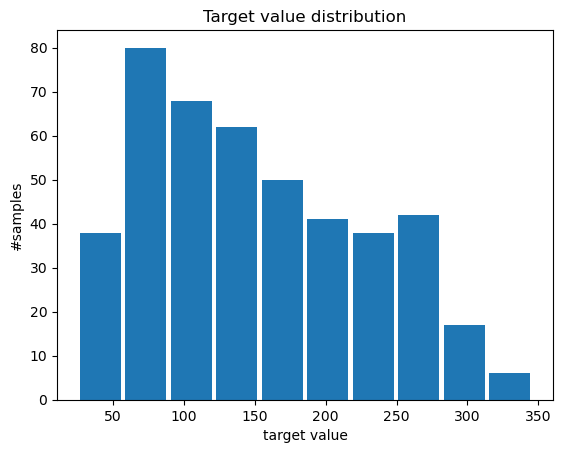

In [243]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [244]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [245]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set 
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [246]:
reg = LinearRegression() # check the documentation to understand the default parameters
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
np.round(reg_score,3)

0.477

**Interpret model coefficients and intercept**

In [247]:
np.round(reg.coef_,3)

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [248]:
np.round(reg.intercept_,3)

151.008

**Your task**: write down the linear regression model with the above coefficients and intercept

In [249]:
'''
traget = 29.254 * age -261.706 * sex + 546.3 * bmi + 388.398 * bp - 901.96 * s1 + 506.763 * s2 + 121.154 * s3 + 
288.035 * s4 + 659.269 * s5 + 41.377 * s6 + 151.008

'''

'\ntraget = 29.254 * age -261.706 * sex + 546.3 * bmi + 388.398 * bp - 901.96 * s1 + 506.763 * s2 + 121.154 * s3 + \n288.035 * s4 + 659.269 * s5 + 41.377 * s6 + 151.008\n\n'

**Your task**: explore other parameters/attributes/methods
- fit_intercept
- feature_names_in_, n_features_in_
Write your exploration code and results below

In [250]:
without_intercept = LinearRegression(fit_intercept = False)
without_intercept.fit(X_train, y_train)
without_intercept_score = without_intercept.score(X_test, y_test)
print(np.round(without_intercept_score,3))
print(np.round(without_intercept.coef_,3))
print(np.round(without_intercept.intercept_,3))


-4.102
[  46.357 -236.495  717.497  339.25  -483.675  139.746   59.973  299.417
  500.726  209.021]
0.0


In [251]:
print(reg.n_features_in_)
print(reg.feature_names_in_)

10
['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']


In [252]:
import sklearn
print(sklearn.__version__)

1.4.0


### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [253]:
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
rg_reg_score = rg_reg.score(X_test, y_test)
np.round(rg_reg_score,3)

0.423

In [254]:
np.round(rg_reg.coef_,3)

array([  45.054,  -71.947,  280.716,  195.213,   -2.229,  -17.541,
       -148.689,  120.467,  198.614,  106.935])

In [255]:
np.round(rg_reg.intercept_,3)

151.867

### Your task: fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [256]:
# Fit model
ls_reg = Lasso(random_state=42)
ls_reg.fit(X_train, y_train)

Lasso(random_state=42)

In [257]:
# Evaluate model performance
ls_reg_score = ls_reg.score(X_test, y_test)
np.round(ls_reg_score,3)

0.362

In [258]:
# Interpret model coefficients and intercept
np.round(ls_reg.coef_,3)

array([  0.   ,  -0.   , 443.703,  51.601,   0.   ,   0.   ,  -0.   ,
         0.   , 201.966,   0.   ])

### Your task: compare the linear/ridge/lasso regression models
- write down your code to create and display the given dataframe

In [259]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure to: 
# - round to 3 digits after the decimal point
# - rename the column names 
# - include intercept and score in the last two rows

data = {
    'linear': np.concatenate((np.round(reg.coef_, 3), np.array([np.round(reg.intercept_, 3), np.round(reg.score(X_test, y_test), 3)]))),
    'ridge': np.concatenate((np.round(rg_reg.coef_, 3), np.array([np.round(rg_reg.intercept_, 3), np.round(rg_reg.score(X_test, y_test), 3)]))),
    'lasso': np.concatenate((np.round(ls_reg.coef_, 3), np.array([np.round(ls_reg.intercept_, 3), np.round(ls_reg.score(X_test, y_test), 3)])))
}

index_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'intercept', 'score']

df = pd.DataFrame(data, index=index_names)
df



,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance 
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty) 

In [260]:
print('For this model, both ridge and lasso help avoid extreme coefficients to avoid overfitting problem of the model.\
However, model performance (score) was not enhaced by applying ridge or lasso.\
      For ridge, extreme coefficients have been avoided, by decreasing the coefficients close to ZERO, \
      but not eaqual to ZERO. However, Lasso can be useful when filtering the important attributes in the regression model,\
       since non-important coefficients will be descresed to ZERO. \
      Ridge can avoid possible model overfitting while preserve all the attributes.')

For this model, both ridge and lasso help avoid extreme coefficients to avoid overfitting problem of the model.However, model performance (score) was not enhaced by applying ridge or lasso.      For ridge, extreme coefficients have been avoided, by decreasing the coefficients close to ZERO,       but not eaqual to ZERO. However, Lasso can be useful when filtering the important attributes in the regression model,       since non-important coefficients will be descresed to ZERO.       Ridge can avoid possible model overfitting while preserve all the attributes.


## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models 
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Fit a polynomail regression model with degree=2

In [261]:
# generate the new polynomial feature matrix for the training data 
# "fit_transform" on the original training data

poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2.shape

(309, 66)

In [262]:
# generate the new polynomial feature matrix for the testing data 
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly2 = poly2.transform(X_test)
X_test_poly2.shape

(133, 66)

In [263]:
# fit a regression model with the newly generated polynomial feature matrix 
# evaluate model performance 

poly2_reg = LinearRegression()
poly2_reg.fit(X_train_poly2, y_train)
poly2_score = poly2_reg.score(X_test_poly2, y_test)
np.round(poly2_score,3)

0.413

### Your task: fit a polynomail regression model with degree=1
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=1** (name it as $poly1\_reg$)

In [264]:
poly1 = PolynomialFeatures(1)
X_train_poly1 = poly1.fit_transform(X_train)
X_train_poly1.shape

(309, 11)

In [265]:
X_test_poly1 = poly1.transform(X_test)
X_test_poly1.shape

(133, 11)

In [266]:
poly1_reg = LinearRegression()
poly1_reg.fit(X_train_poly1, y_train)
poly1_score = poly1_reg.score(X_test_poly1, y_test)
np.round(poly1_score,3)

0.477

### Your task: fit a polynomail regression model with degree=3
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=3** (name it as $poly3\_reg$)

In [267]:
poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train)
X_train_poly3.shape

(309, 286)

In [268]:
X_test_poly3 = poly3.transform(X_test)
X_test_poly3.shape

(133, 286)

In [269]:
poly3_reg = LinearRegression()
poly3_reg.fit(X_train_poly3, y_train)
poly3_score = poly3_reg.score(X_test_poly3, y_test)
np.round(poly3_score,3)

-92.583

### Your task: compare the polynomial regression models with degree=1/2/3 and the original linear regression model
- please write code to create and display the given data frame

In [270]:
data = {
    'original linear': np.round(reg.score(X_test, y_test), 3),
    'degree = 1': np.round(poly1_score,3),
    'degree = 2': np.round(poly2_score,3),
    'degree = 3': np.round(poly3_score,3)
}

index_names = ['score']

df = pd.DataFrame(data, index=index_names)
df

,original linear,degree = 1,degree = 2,degree = 3
score,0.477,0.477,0.413,-92.583


### Your task: observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

In [271]:
print('Polynomial with a degree of 1 eqauls to the orignal linear regression.\n If the original linear regression is thought be underfitting,\n \
      one can increase the degree to complicate the model. However,  in our case, when the polynomial degree is set to 2 or 3,\n \
      the model score descreases. That might be due to overfitting of model that is too complicated.')

Polynomial with a degree of 1 eqauls to the orignal linear regression.
 If the original linear regression is thought be underfitting,
       one can increase the degree to complicate the model. However,  in our case, when the polynomial degree is set to 2 or 3,
       the model score descreases. That might be due to overfitting of model that is too complicated.


### Your task: interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute positively/negatively/most/least to diabetes
- does these statistical correlations make sense from biological perspective? 

In [272]:
print('Amongst the the performance of different models, we can take a look at the original linear regression model\
      with the highest score. We can further observe the value of the coefficients to understand the weight\
      of each feature or attribute that contributes to the target value. In diabetes case, amongst all the features \
      s1, tc, total serum cholesterol contributes most negatively to diabetes, while bmi and s5 ltg, possibly log \
      of serum triglycerides level contributes the most positively to diabetes. Age and glu, blood sugar level\
      contributes the least to diabetes.')
print('I think the data/regression model (especially lasso) point out several features that is highly related to\
      diabetes: bmi and s5 ltg, possibly log of serum triglycerides level, which relate diabetes to obesity problem.\
      That matches my limited biological knowledges.')

Amongst the the performance of different models, we can take a look at the original linear regression model      with the highest score. We can further observe the value of the coefficients to understand the weight      of each feature or attribute that contributes to the target value. In diabetes case, amongst all the features       s1, tc, total serum cholesterol contributes most negatively to diabetes, while bmi and s5 ltg, possibly log       of serum triglycerides level contributes the most positively to diabetes. Age and glu, blood sugar level      contributes the least to diabetes.
I think the data/regression model (especially lasso) point out several features that is highly related to      diabetes: bmi and s5 ltg, possibly log of serum triglycerides level, which relate diabetes to obesity problem.      That matches my limited biological knowledges.


## Linear models for classification: LogisticRegression 
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool: 
    1. variance (continuous) 
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [273]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [274]:
# please change to your file path
df_data = pickle.load(open('./banknote_authentication_dataframe.pickle','rb'))

### Basic dataset exploration

In [275]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0.0
1,4.54590,8.16740,-2.4586,-1.46210,0.0
2,3.86600,-2.63830,1.9242,0.10645,0.0
3,3.45660,9.52280,-4.0112,-3.59440,0.0
4,0.32924,-4.45520,4.5718,-0.98880,0.0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1.0
1368,-1.38870,-4.87730,6.4774,0.34179,1.0
1369,-3.75030,-13.45860,17.5932,-2.77710,1.0
1370,-3.56370,-8.38270,12.3930,-1.28230,1.0


In [276]:
# describe the data 
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Prepara data for model training and testing

In [277]:
feature_names = ['variance','skewness','curtosis','entropy']

# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [278]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

### Fit LogisticRegression models with different parameter settings
- L1 VS L2 penalty
- C values (inverse of regularization strength)

In [279]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(X_train, y_train)

In [280]:
clf.score(X_test, y_test)

0.9878640776699029

In [281]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [282]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.982, 0.018],
       [0.996, 0.004]])

**Your task**: explore at least one different set of parameters to re-fit the model: solver, penalty, C

In [283]:
clf_l2 = LogisticRegression(random_state=0, solver='liblinear', penalty='l2', C=1.0).fit(X_train, y_train)
clf_l2.score(X_test, y_test)

0.9878640776699029

In [284]:
clf_l2.predict(X_test[:3])

array([0., 0., 0.])

In [285]:
np.round(clf_l2.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.963, 0.037],
       [0.987, 0.013]])

In [286]:
clf_l2_lite = LogisticRegression(random_state=0, solver='liblinear', penalty='l2', C=100).fit(X_train, y_train)
clf_l2_lite.score(X_test, y_test)

0.9902912621359223

In [287]:
np.round(clf_l2_lite.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.999, 0.001],
       [1.   , 0.   ]])

### Compare model performance with different c values and different penalties

In [288]:
def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression
    
    return: 
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """
     
    # set the model parameter c to different values and train the model 
    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    #    fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
    #    test and record the model performance 
    #    get the statistical information about the model coefficients: 
    #        min: minimum coefficient
    #        max: minimum coefficient
    #        mean(abs(coef)): average over the absolute coefficient values
    #        n_zero: number of coefficients equal to zero 
    
    ### Your code starts from here 

    data = []

    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        clf = LogisticRegression(random_state=0, solver='liblinear', penalty=p, C=c).fit(X_train, y_train)
        min = np.round(np.min(clf.coef_),3)
        max = np.round(np.max(clf.coef_),3)
        mean = np.round(np.mean(np.abs(clf.coef_)),3)
        n_zero = np.count_nonzero(clf.coef_ == 0)
        score = np.round(clf.score(X_test, y_test),3)
        data.append([c, min, max, mean, n_zero, score])
    
    index_names = ['c', 'min', 'max', 'mean_abs', 'n_zero', 'test_score']
    df = pd.DataFrame(data, columns=index_names)

    return clf, df
    
    

In [289]:
# running example
l2_clfs, c_effect_l2 = compare_c(X_train, y_train, X_test, y_test, p='l2')
c_effect_l2

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.357,-0.074,0.190,0,0.922
1,0.010,-0.861,-0.173,0.485,0,0.973
2,0.100,-1.581,-0.163,0.915,0,0.988
3,1.000,-2.835,-0.166,1.645,0,0.988
4,10.000,-5.171,-0.290,2.937,0,0.988
5,100.000,-7.648,-0.438,4.297,0,0.990


In [290]:
# running example
l1_clfs, c_effect_l1 = compare_c(X_train, y_train, X_test, y_test, p='l1')
c_effect_l1

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.042,0.000,0.010,3,0.624
1,0.010,-0.807,0.000,0.328,1,0.917
2,0.100,-1.749,0.000,0.935,1,0.988
3,1.000,-3.852,-0.133,2.172,0,0.988
4,10.000,-7.081,-0.387,3.977,0,0.990
5,100.000,-8.179,-0.463,4.586,0,0.990


**Your thoughts and observations:** 
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table 

In [291]:
print('When one increases the value of C, the regularization of the model decreases,\
       which makes the model more complicated. In this case, the test score increases,\
      which means the model with samll C value, might encounter underfitting problems.')
print('There are zero values in the coefficients of L1, which means some features\
      have been ignored in L1, while all the features in L2 are still preserved. \
      L2 scores are pretty constantly good amongst different C values, which means\
      the regularization strength does not influence the result too much in L2. \
      However when some non-significant features removed in L1 and complexity of \
      the model is reduced, underfitting problem shows up.')


When one increases the value of C, the regularization of the model decreases,       which makes the model more complicated. In this case, the test score increases,      which means the model with samll C value, might encounter underfitting problems.
There are zero values in the coefficients of L1, which means some features      have been ignored in L1, while all the features in L2 are still preserved.       L2 scores are pretty constantly good amongst different C values, which means      the regularization strength does not influence the result too much in L2.       However when some non-significant features removed in L1 and complexity of       the model is reduced, underfitting problem shows up.


### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition 

In [292]:
np.round(clf.coef_, 3)
#variance	skewness	curtosis	entropy

'''
With the increase of all of the four features, the probability of the ceck being 
genuine descreased. due to the negative coefficients. However, entropy is the least
related feature amongst the four. It makes sense in image recognition, because the
increased variance/skewness/curtosis in an image might mean, the banknote does not 
have a high quality. It might be forged.

'''


'\nWith the increase of all of the four features, the probability of the ceck being \ngenuine descreased. due to the negative coefficients. However, entropy is the least\nrelated feature amongst the four. It makes sense in image recognition, because the\nincreased variance/skewness/curtosis in an image might mean, the banknote does not \nhave a high quality. It might be forged.\n\n'

## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?

In [293]:
print('''
I think the overall implementation and the testing scores process of models with 
different parameters have been quite interesting to me. Also interpreting the result
using real-world cases, give me good practice in data-driven storytelling.

''')


I think the overall implementation and the testing scores process of models with 
different parameters have been quite interesting to me. Also interpreting the result
using real-world cases, give me good practice in data-driven storytelling.


